# Titanic use case

# Importing required libraries

In [46]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')
import matplotlib.pyplot as plt

# Loading Dataset

In [47]:
df=pd.read_csv('titanic_train.csv')

In [48]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [49]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [50]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [51]:
df.shape

(891, 12)

In [52]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Data preparation

In [53]:
df.describe() #statistical summary

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


This is showing there are some missing values.
There is difference between mean and median so outliers are present.so we will validate it further 

In [54]:
df=df.rename(columns={'Pclass':'class'})

In [55]:
df

,PassengerId,Survived,class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [56]:
df.info()  #checking datatype of column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   class        891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [57]:
df.columns

Index(['PassengerId', 'Survived', 'class', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [58]:
df.isnull().sum() #checking for missing values

PassengerId      0
Survived         0
class            0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df['Survived'].isnull().sum()

0

In [60]:
df['class'].isnull().sum()

0

In [61]:
df.replace(np.NaN,0)

,PassengerId,Survived,class,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,0,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,0.0,1,2,W./C. 6607,23.4500,0,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# EDA

{'whiskers': [<matplotlib.lines.Line2D at 0x80a2178>,
 'caps': [<matplotlib.lines.Line2D at 0x80a24d8>,
 'boxes': [<matplotlib.lines.Line2D at 0x8084fa0>],
 'medians': [<matplotlib.lines.Line2D at 0x80a2838>],
 'fliers': [<matplotlib.lines.Line2D at 0x80a29e8>],
 'means': []}

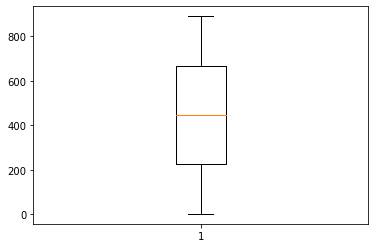

In [62]:
plt.boxplot(df.PassengerId)

{'whiskers': [<matplotlib.lines.Line2D at 0x7de1328>,
 'caps': [<matplotlib.lines.Line2D at 0x7e51b68>,
 'boxes': [<matplotlib.lines.Line2D at 0x7de1f28>],
 'medians': [<matplotlib.lines.Line2D at 0x7e1f4d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7dfca60>],
 'means': []}

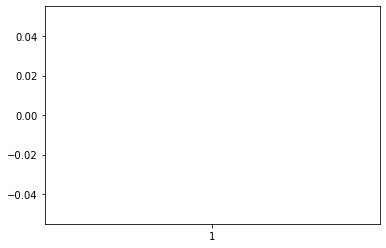

In [63]:
plt.boxplot(df.Age)

{'whiskers': [<matplotlib.lines.Line2D at 0x80abcb8>,
 'caps': [<matplotlib.lines.Line2D at 0x8301040>,
 'boxes': [<matplotlib.lines.Line2D at 0x80abaf0>],
 'medians': [<matplotlib.lines.Line2D at 0x83013a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x8301550>],
 'means': []}

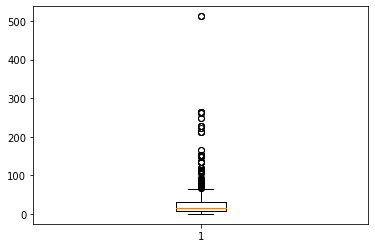

In [64]:
plt.boxplot(df.Fare)

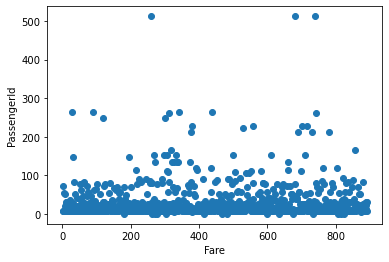

In [65]:
plt.scatter(df.PassengerId,df.Fare)
plt.xlabel('Fare')
plt.ylabel('PassengerId')
plt.show()


In [66]:
from scipy.stats import zscore
z=np.abs(zscore(df.Fare))
z

array([5.02445171e-01, 7.86845294e-01, 4.88854258e-01, 4.20730236e-01,
       4.86337422e-01, 4.78116429e-01, 3.95813561e-01, 2.24083121e-01,
       4.24256141e-01, 4.29555021e-02, 3.12172378e-01, 1.13845709e-01,
       4.86337422e-01, 1.87093118e-02, 4.90279793e-01, 3.26266659e-01,
       6.19988892e-02, 3.86670720e-01, 2.85997284e-01, 5.02948539e-01,
       1.24919787e-01, 3.86670720e-01, 4.86756223e-01, 6.63597416e-02,
       2.24083121e-01, 1.64441595e-02, 5.02948539e-01, 4.64700108e+00,
       4.89776426e-01, 4.89442190e-01, 9.02720170e-02, 2.30172882e+00,
       4.92377828e-01, 4.37007438e-01, 1.00606170e+00, 3.98582080e-01,
       5.02863973e-01, 4.86337422e-01, 2.85997284e-01, 4.22073541e-01,
       4.57645492e-01, 2.25593223e-01, 4.89442190e-01, 1.88762532e-01,
       4.89776426e-01, 4.86337422e-01, 3.36334002e-01, 4.92377828e-01,
       2.11917743e-01, 2.90024222e-01, 1.50673744e-01, 4.91371093e-01,
       8.96496787e-01, 1.24919787e-01, 5.99510151e-01, 6.63597416e-02,
      

In [67]:
threshold=3
print(np.where(z>3))


(array([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679,
       689, 700, 716, 730, 737, 742, 779], dtype=int32),)


In [68]:
z[27]


4.647001076532463

In [69]:
import seaborn as sns
titanicds=sns.load_dataset('titanic')
print(titanicds)

     survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0           0       3    male  22.0      1      0   7.2500        S   Third   
1           1       1  female  38.0      1      0  71.2833        C   First   
2           1       3  female  26.0      0      0   7.9250        S   Third   
3           1       1  female  35.0      1      0  53.1000        S   First   
4           0       3    male  35.0      0      0   8.0500        S   Third   
..        ...     ...     ...   ...    ...    ...      ...      ...     ...   
886         0       2    male  27.0      0      0  13.0000        S  Second   
887         1       1  female  19.0      0      0  30.0000        S   First   
888         0       3  female   NaN      1      2  23.4500        S   Third   
889         1       1    male  26.0      0      0  30.0000        C   First   
890         0       3    male  32.0      0      0   7.7500        Q   Third   

       who  adult_male deck  embark_town alive  alo

In [70]:
titanicds['class'].value_counts()


Third     491
First     216
Second    184
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

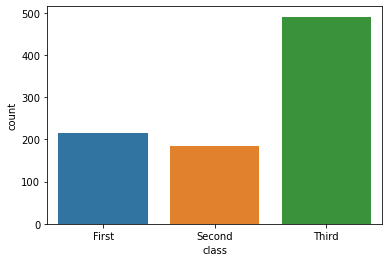

In [71]:
sns.countplot(titanicds['class'])

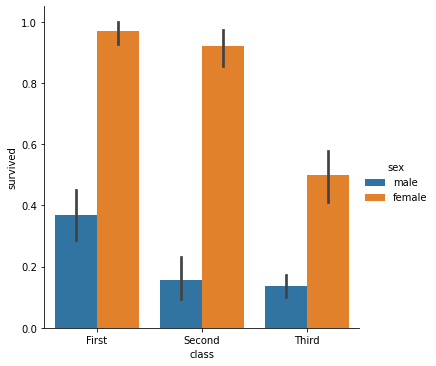

In [72]:
g=sns.catplot(x="class",y="survived",hue="sex",data=titanicds,kind="bar")
plt.show()

In [73]:
dfc=df.corr()
dfc

,PassengerId,Survived,class,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
class,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<AxesSubplot:>

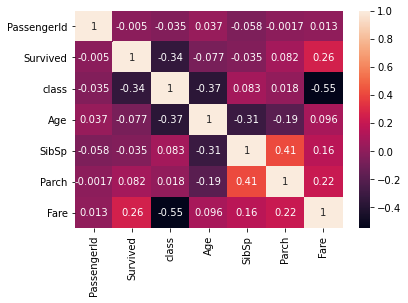

In [74]:
sns.heatmap(dfc,annot=True)

<AxesSubplot:xlabel='survived', ylabel='class'>

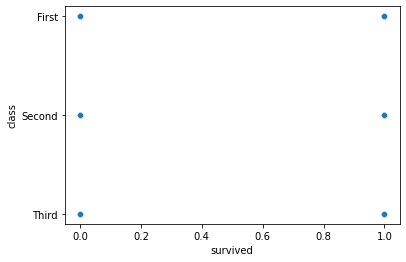

In [75]:
sns.scatterplot(x='survived',y='class',data=titanicds)

In [76]:
df.dtypes

PassengerId      int64
Survived         int64
class            int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [77]:
df=df.drop(['Name'],axis=1)

In [78]:
df=df.drop(['Cabin'],axis=1)

In [99]:
df=df.drop(['Ticket'],axis=1)

In [100]:
df

,PassengerId,Survived,class,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.0,0,0,13.0000,S
887,888,1,1,0,19.0,0,0,30.0000,S
888,889,0,3,0,NaN,1,2,23.4500,S
889,890,1,1,1,26.0,0,0,30.0000,C


In [101]:
df['Sex'].unique()

array([1, 0])

In [103]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [108]:
df.drop(['Embarked'],inplace=True,axis=1)

In [109]:
df.isnull().sum()

PassengerId      0
Survived         0
class            0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
dtype: int64

In [111]:
df.dropna(inplace=True)

In [112]:
df.shape

(714, 8)

In [113]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
df.iloc[:,3]=le.fit_transform(df.iloc[:,3].values)

In [118]:
print(df['Sex'].unique())

[1 0]


In [119]:
df

,PassengerId,Survived,class,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,16
1,2,1,1,0,38.0,1,0,180
2,3,1,3,0,26.0,0,0,32
3,4,1,1,0,35.0,1,0,163
4,5,0,3,1,35.0,0,0,34
...,...,...,...,...,...,...,...,...
885,886,0,3,0,39.0,0,5,128
886,887,0,2,1,27.0,0,0,72
887,888,1,1,0,19.0,0,0,130
889,890,1,1,1,26.0,0,0,130


In [122]:
x=df.drop(['Survived'],axis=1)
x.shape
x

,PassengerId,class,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,16
1,2,1,0,38.0,1,0,180
2,3,3,0,26.0,0,0,32
3,4,1,0,35.0,1,0,163
4,5,3,1,35.0,0,0,34
...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,128
886,887,2,1,27.0,0,0,72
887,888,1,0,19.0,0,0,130
889,890,1,1,26.0,0,0,130


In [124]:
y=df['Survived']
y
y.shape

(714,)

In [128]:
pd.DataFrame(data=x)

,PassengerId,class,Sex,Age,SibSp,Parch,Fare
0,1,3,1,22.0,1,0,16
1,2,1,0,38.0,1,0,180
2,3,3,0,26.0,0,0,32
3,4,1,0,35.0,1,0,163
4,5,3,1,35.0,0,0,34
...,...,...,...,...,...,...,...
885,886,3,0,39.0,0,5,128
886,887,2,1,27.0,0,0,72
887,888,1,0,19.0,0,0,130
889,890,1,1,26.0,0,0,130


In [137]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [138]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=42)

In [139]:
x_train.shape

(478, 7)

In [140]:
y_train.shape

(478,)

In [141]:
x_test.shape

(236, 7)

In [142]:
y_test.shape

(236,)

In [145]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
predlr=lr.predict(x_test)
print('accuracy score',accuracy_score(y_test,predlr))
print('confusion matrix',confusion_matrix(y_test,predlr))
print('classification report',classification_report(y_test,predlr))

accuracy score 0.7669491525423728
confusion matrix [[116  21]
 [ 34  65]]
classification report               precision    recall  f1-score   support

           0       0.77      0.85      0.81       137
           1       0.76      0.66      0.70        99

    accuracy                           0.77       236
   macro avg       0.76      0.75      0.76       236
weighted avg       0.77      0.77      0.76       236



In [146]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)
predgnb=gnb.predict(x_test)
print('a r',accuracy_score(y_test,predgnb))
print ('cn rep',confusion_matrix(y_test,predgnb))
print('cls reprt',classification_report(y_test,predgnb))

a r 0.7754237288135594
cn rep [[111  26]
 [ 27  72]]
cls reprt               precision    recall  f1-score   support

           0       0.80      0.81      0.81       137
           1       0.73      0.73      0.73        99

    accuracy                           0.78       236
   macro avg       0.77      0.77      0.77       236
weighted avg       0.78      0.78      0.78       236



In [147]:
svc=SVC()
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.690677966101695
[[125  12]
 [ 61  38]]
              precision    recall  f1-score   support

           0       0.67      0.91      0.77       137
           1       0.76      0.38      0.51        99

    accuracy                           0.69       236
   macro avg       0.72      0.65      0.64       236
weighted avg       0.71      0.69      0.66       236



In [148]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7330508474576272
[[107  30]
 [ 33  66]]
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       137
           1       0.69      0.67      0.68        99

    accuracy                           0.73       236
   macro avg       0.73      0.72      0.72       236
weighted avg       0.73      0.73      0.73       236



In [149]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score


In [150]:
y_pred_prob=lr.predict_proba(x_test)[:,1]

In [151]:
y_pred_prob

array([0.11176866, 0.25126534, 0.7211499 , 0.94633926, 0.05981255,
       0.40907603, 0.38295034, 0.38815313, 0.49861071, 0.67091936,
       0.94412687, 0.6512875 , 0.47635459, 0.0611201 , 0.95781432,
       0.07012541, 0.08205113, 0.92881126, 0.25785336, 0.8250586 ,
       0.36682206, 0.62906984, 0.77135381, 0.74224738, 0.13136057,
       0.13176856, 0.16553755, 0.08589398, 0.68517683, 0.09338874,
       0.59152167, 0.68903375, 0.32659649, 0.07050346, 0.02833009,
       0.6741359 , 0.16827612, 0.29833832, 0.19195847, 0.04658315,
       0.19842139, 0.16596629, 0.8884198 , 0.09803802, 0.25197911,
       0.61627782, 0.7457998 , 0.65957461, 0.04679688, 0.8056195 ,
       0.31051817, 0.71838869, 0.48831634, 0.29766662, 0.11039473,
       0.54613779, 0.4308859 , 0.08980331, 0.08298661, 0.07212784,
       0.65455241, 0.11592925, 0.60108924, 0.20429623, 0.17659051,
       0.25367028, 0.25723607, 0.90997299, 0.11751746, 0.09088139,
       0.16448406, 0.90926267, 0.22852583, 0.07765438, 0.03565

In [152]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

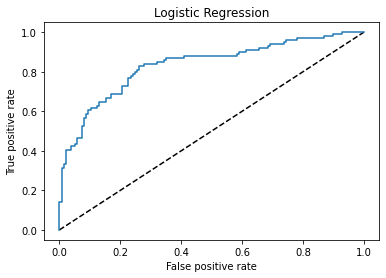

In [153]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label= 'Logistic Regression')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Logistic Regression')
plt.show()

In [154]:
auc_score=roc_auc_score(y_test,lr.predict(x_test))

In [155]:
print(auc_score)

0.7516404925164049


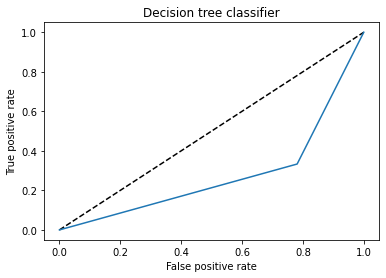

0.7238442822384428


In [156]:
#decision tree curve
y_pred_prob=dt.predict_proba(x_test)[:,0]
y_pred_prob
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Decision tree classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Decision tree classifier')
plt.show()
auc_score=roc_auc_score(y_test,dt.predict(x_test))
print(auc_score)

In [159]:
dft=pd.DataFrame(predgnb)
dft.to_csv('SURVIVED PRED_gnb.csv')

In [161]:
#from sklearn.externals import joblib
import joblib
joblib.dump(gnb,'gnbfile.obj')
gnb_from_joblib=joblib.load('gnbfile.obj')
gnb_from_joblib.predict(x_test)

array([0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)